In [1]:
# import numpy as np
# import pandas as pd
# import imageio
# import glob
# from zipfile import ZipFile 

# #my childhood soccer number
# np.random.seed(33)


# df = pd.read_csv('data/styles.csv', error_bad_lines=False)


# all_img = []
# for i, ix in enumerate( df.id ):
#     if i%2000==0:
#         print(i, len(df))

#     fn = r'data/data/images/{}.jpg'.format(ix)
#     try:
#         img = imageio.imread(fn)
#         if img.shape!=(80, 60, 3):
#             all_img.append( [0]*(60*80*3) )
#         else:
#             all_img.append( img.ravel() )
#     except FileNotFoundError:
#         all_img.append( [0]*(60*80*3) )

# all_img = np.stack(all_img)
# bw_float64 = all_img.reshape(-1, 80, 60, 3).mean(3).reshape(-1, 80*60)
# bw_img = bw_float64.astype('float16')
# np.savez_compressed('data/original_image_arr', a=all_img, b=bw_img)

0 44446
2000 44446
4000 44446
6000 44446
8000 44446
10000 44446
12000 44446
14000 44446
16000 44446
18000 44446
20000 44446
22000 44446
24000 44446
26000 44446
28000 44446
30000 44446
32000 44446
34000 44446
36000 44446
38000 44446
40000 44446
42000 44446
44000 44446


In [2]:
#standard imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import imageio

In [3]:
df = pd.read_csv('data/full_labels_df.csv')

In [3]:
loaded = np.load('data/full_image_arr.npz')
bw_img = loaded['b']

In [4]:
# labels = df.masterCategory.copy()
# labels = labels.astype('category')
# labels = labels.cat.codes

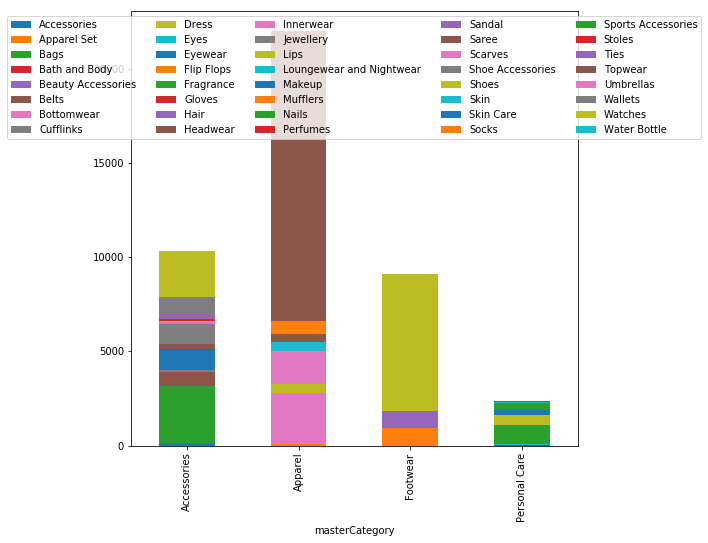

In [112]:
df2 = df[['masterCategory','subCategory', 'id']].groupby(['masterCategory','subCategory']).count().unstack('subCategory').fillna(0)
df3 = df2['id']
df4 = df3.transpose()
df3.plot(kind='bar', stacked=True,figsize=(8,8))
plt.legend(loc='upper center', ncol=5)

In [103]:
masterCat_codes = {}
for i in range(len(labels.value_counts().index)):
    s = labels.value_counts().index[i]
    t = df.masterCategory.value_counts().index[i]
    masterCat_codes[s] = t
masterCat_codes

NameError: name 'labels' is not defined

In [6]:
masterCat_counts = {}
for i in range(len(labels.value_counts().index)):
    s = labels.value_counts().values[i]
    t = df.masterCategory.value_counts().index[i]
    masterCat_counts[t] = s
masterCat_counts

{'Apparel': 21341,
 'Accessories': 11004,
 'Footwear': 9119,
 'Personal Care': 2393}

In [30]:
subCat_counts = {}
for i in range(len(df.subCategory.value_counts().index)):
    s = df.subCategory.value_counts().values[i]
    t = df.subCategory.value_counts().index[i]
    subCat_counts[t] = s


In [9]:
cat_names = pd.Series(list(df.masterCategory.value_counts().index))
cat_counts = df.masterCategory.value_counts().values
df.masterCategory.value_counts().sum()
cat_percent = np.round(df.masterCategory.value_counts().values/43857, 2)
summary_df = pd.DataFrame(cat_names, index=range(4), columns=['Main Category'])
summary_df['Item Count'] = cat_counts
summary_df['Percent of Full Dataset'] = cat_percent
summary_df

,Main Category,Item Count,Percent of Full Dataset
0,Apparel,21341,0.49
1,Accessories,11004,0.25
2,Footwear,9119,0.21
3,Personal Care,2393,0.05


In [39]:
list(df.subCategory.value_counts().index)

Index(['Topwear', 'Shoes', 'Bags', 'Bottomwear', 'Watches', 'Innerwear',
       'Eyewear', 'Jewellery', 'Fragrance', 'Sandal', 'Flip Flops', 'Wallets',
       'Belts', 'Socks', 'Lips', 'Dress', 'Loungewear and Nightwear', 'Saree',
       'Nails', 'Makeup', 'Headwear', 'Ties', 'Accessories', 'Scarves',
       'Apparel Set', 'Cufflinks', 'Stoles', 'Skin Care', 'Skin', 'Eyes',
       'Mufflers', 'Shoe Accessories', 'Hair', 'Gloves', 'Bath and Body',
       'Water Bottle', 'Perfumes', 'Umbrellas', 'Beauty Accessories',
       'Sports Accessories'],
      dtype='object')

In [5]:
def multi_index_counts(col, col2):
    counts = df.groupby([col, col2]).count().id
    return counts

In [6]:
multi_index_counts('masterCategory', 'subCategory')

masterCategory  subCategory             
Accessories     Accessories                   143
                Bags                         3002
                Belts                         788
                Cufflinks                     102
                Eyewear                      1067
                Gloves                         19
                Headwear                      286
                Jewellery                    1043
                Mufflers                       38
                Perfumes                        1
                Scarves                       116
                Shoe Accessories               23
                Sports Accessories              3
                Stoles                         90
                Ties                          251
                Umbrellas                       6
                Wallets                       894
                Watches                      2461
                Water Bottle                    7
Apparel  

In [30]:
counts = df.subCategory.value_counts()
print(counts.index)
counts


short_list = ['Accessories', 'Apparel Set', 'Cufflinks', 'Stoles', 'Skin Care', 'Skin','Mufflers', 'Shoe Accessories', 'Hair', 'Gloves', 'Bath and Body','Water Bottle', 'Umbrellas', 'Beauty Accessories', 'Sports Accessories']

Index(['Topwear', 'Shoes', 'Bags', 'Bottomwear', 'Watches', 'Innerwear',
       'Eyewear', 'Jewellery', 'Fragrance', 'Sandal', 'Flip Flops', 'Wallets',
       'Belts', 'Socks', 'Lips', 'Dress', 'Loungewear and Nightwear', 'Saree',
       'Nails', 'Makeup', 'Headwear', 'Ties', 'Accessories', 'Scarves',
       'Apparel Set', 'Cufflinks', 'Stoles', 'Skin Care', 'Skin', 'Eyes',
       'Mufflers', 'Shoe Accessories', 'Hair', 'Gloves', 'Bath and Body',
       'Water Bottle', 'Perfumes', 'Umbrellas', 'Beauty Accessories',
       'Sports Accessories'],
      dtype='object')


Topwear                     15393
Shoes                        7266
Bags                         3002
Bottomwear                   2685
Watches                      2461
Innerwear                    1773
Eyewear                      1067
Jewellery                    1043
Fragrance                    1010
Sandal                        943
Flip Flops                    910
Wallets                       894
Belts                         788
Socks                         676
Lips                          526
Dress                         478
Loungewear and Nightwear      470
Saree                         424
Nails                         329
Makeup                        302
Headwear                      286
Ties                          251
Accessories                   143
Scarves                       116
Apparel Set                   106
Cufflinks                     102
Stoles                         90
Skin Care                      77
Skin                           68
Eyes          

In [29]:
plt.imshow( bw_img[21,:].reshape(80,60)/255 )

NameError: name 'bw_img' is not defined